<a href="https://colab.research.google.com/github/Ruoro/paddleOCR/blob/main/OCRcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. installl dependencies

In [6]:
!python3 -m pip install paddlepaddle-gpu -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 435.4 MB 26 kB/s 


In [7]:
# GitHub repo installation of paddle
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [8]:
! pip install paddleocr

     |████████████████████████████████| 328 kB 7.3 MB/s 
     |████████████████████████████████| 55.7 MB 68 kB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 948 kB 41.1 MB/s 
     |████████████████████████████████| 2.7 MB 56.1 MB/s 
     |████████████████████████████████| 603 kB 65.6 MB/s 
     |████████████████████████████████| 404 kB 72.8 MB/s 
     |████████████████████████████████| 197 kB 52.1 MB/s 
     |████████████████████████████████| 127 kB 65.9 MB/s 
     |████████████████████████████████| 2.1 MB 46.3 MB/s 
     |████████████████████████████████| 64 kB 3.8 MB/s 
     |████████████████████████████████| 69 kB 9.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 56.4 MB/s 
     |████████████████████████████████| 8.8 MB 60.5 MB/s 
     |████████████████████████████████| 596 kB 68.0 MB/s 
     |████████████████████████████████| 98 kB 10.3 MB/s 
     |███████████████████

In [ ]:
#  Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 24354, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 24354 (delta 34), reused 30 (delta 14), pack-reused 24293
Receiving objects: 100% (24354/24354), 162.92 MiB | 26.00 MiB/s, done.
Resolving deltas: 100% (16654/16654), done.


For specific fonts

In [9]:
# Importing dependancies
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sc

# instantiate model

In [10]:
# Setup model
ocr_model = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_ppocr_mobile_v2.0_det_infer.tar to /root/.paddleocr/whl/det/en/en_ppocr_mobile_v2.0_det_infer/en_ppocr_mobile_v2.0_det_infer.tar


100%|██████████| 3.16M/3.16M [00:10<00:00, 301kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_number_mobile_v2.0_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_number_mobile_v2.0_rec_infer/en_number_mobile_v2.0_rec_infer.tar


100%|██████████| 2.70M/2.70M [00:10<00:00, 256kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:08<00:00, 170kiB/s]

[2022/05/02 11:27:34] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgne

In [77]:
img_path = os.path.join('.', 'meme2.jpg')

In [78]:
img_path

'./meme2.jpg'

In [79]:
result = ocr_model.ocr(img_path)

[2022/05/02 11:59:50] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/05/02 11:59:50] ppocr DEBUG: dt_boxes num : 6, elapse : 0.04385972023010254
[2022/05/02 11:59:50] ppocr DEBUG: rec_res num  : 6, elapse : 0.007798910140991211


In [80]:
result[0][1][0]

'Saying'

In [81]:


for res in result:
  print (res[1][0])

Saying
"'no u'
to an insult
Saying
"no u'
to a compliment


# visualize results

In [82]:
boxes = [res[0] for res in result]
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [83]:
scores

[0.9599392414093018,
 0.9624822735786438,
 0.9899343848228455,
 0.9906702637672424,
 0.9877467155456543,
 0.9737246632575989]

In [84]:
 font_path = os.path.join('.' ,"PaddleOCR", 'doc', 'fonts', 'latin.ttf')

In [85]:
font_path

'./PaddleOCR/doc/fonts/latin.ttf'

In [86]:
# import the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) #reorder color channels

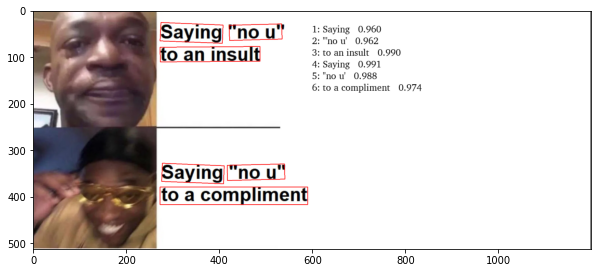

In [87]:
# visulaize our image
plt.figure(figsize=(10,10))

#draw annotation on image
annotated = draw_ocr(img, boxes, texts, scores, font_path = font_path) 
# Show the annnotated image
plt.imshow(annotated)